Date <12/10/2025>
Written by <Weixi Huang> <wh2610@columbia.edu>
The code has not been generated by AI tools, or copied from an external resource

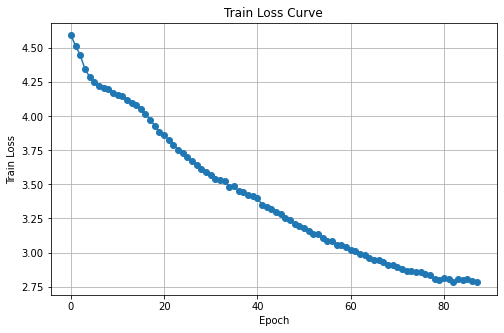

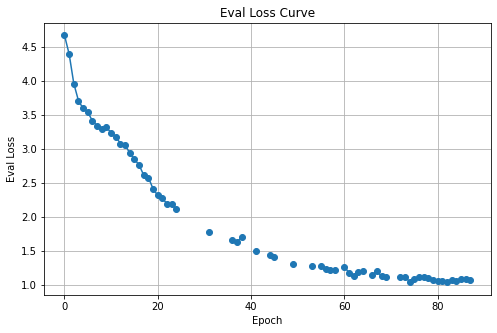

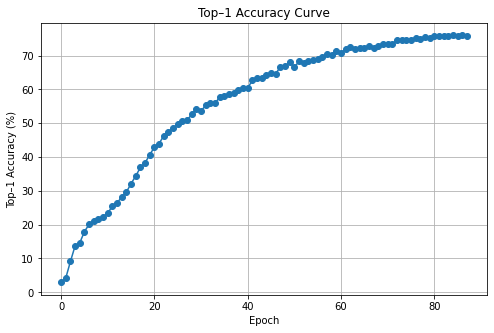

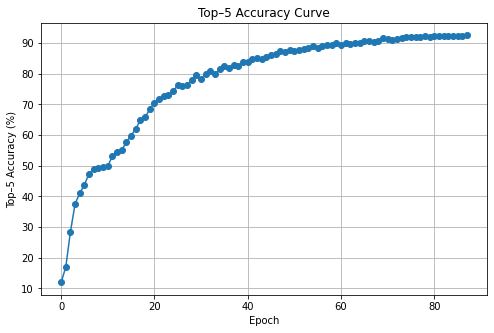

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("summary.csv")
df["epoch"] = df["epoch"].astype(int)

def plot_curve(x, y, title, ylabel):
    plt.figure(figsize=(8,5))
    plt.plot(x, y, marker="o")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

plot_curve(df["epoch"], df["train_loss"], "Train Loss Curve", "Train Loss")
plot_curve(df["epoch"], df["eval_loss"], "Eval Loss Curve", "Eval Loss")
plot_curve(df["epoch"], df["eval_top1"], "Top–1 Accuracy Curve", "Top–1 Accuracy (%)")
plot_curve(df["epoch"], df["eval_top5"], "Top–5 Accuracy Curve", "Top–5 Accuracy (%)")


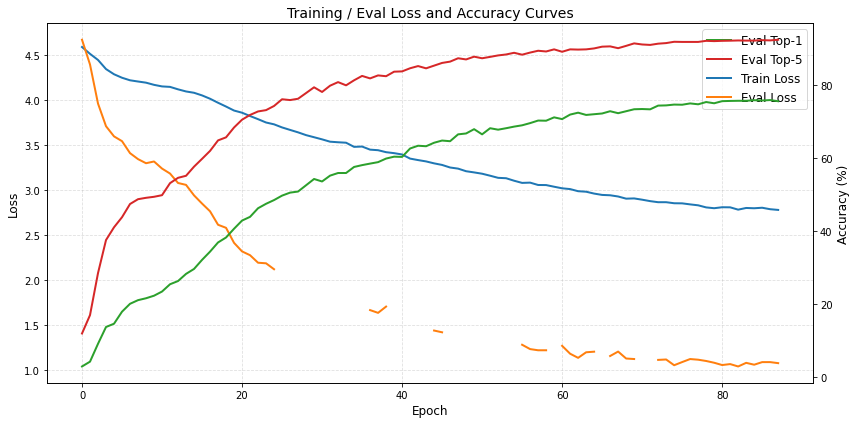

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("summary.csv")
df = df.replace([np.nan], np.nan)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df["epoch"], df["train_loss"], label="Train Loss",
         color="#1f77b4", linewidth=2)
ax1.plot(df["epoch"], df["eval_loss"], label="Eval Loss",
         color="#ff7f0e", linewidth=2)

ax1.set_xlabel("Epoch", fontsize=12)
ax1.set_ylabel("Loss", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.4)

ax2 = ax1.twinx()

ax2.plot(df["epoch"], df["eval_top1"], label="Eval Top-1",
         color="#2ca02c", linewidth=2)
ax2.plot(df["epoch"], df["eval_top5"], label="Eval Top-5",
         color="#d62728", linewidth=2)

ax2.set_ylabel("Accuracy (%)", fontsize=12)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(lines_2 + lines_1, labels_2 + labels_1,
           loc="upper right", fontsize=12)

plt.title("Training / Eval Loss and Accuracy Curves", fontsize=14)
plt.tight_layout()
plt.show()